In [65]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib.colors import LogNorm 
import copy
import random
import time

In [66]:
def initialise_state(N): #N is the grid dimension (in the above example, N=4)
    '''
    Author: Siddharth Bachoti
    ~Function Description~
    '''
    grid = np.ones((N,N,2),dtype=int)
    
    return np.array(grid)


In [67]:
def plot_vector(p1,p2):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    p1 = np.array(p1)
    p2 = np.array(p2)
    dp = p2-p1
    plt.quiver(p1[0], p1[1], dp[0], dp[1],angles='xy', scale_units='xy', scale=1, headwidth = 5, headlength = 7)

def get_coord_list(arr):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    coord_list=[]
    num = len(arr)
    for i in range(num):
        temp_coord = []
        for j in range(num):
            current_elems = arr[i][j]
            xpt = (num-1)-i
            ypt = j
            temp_coord.append((xpt,ypt))
        coord_list.append(temp_coord)
    return coord_list

def visualise_2d_model(arr,savefig=False,savename=".temp"):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    num = len(arr)
    plt.axes().set_aspect('equal')
    coord_list = get_coord_list(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            x_current = coord_list[i][j][1]
            y_current = coord_list[i][j][0]

            lower_neighbour_up_state = arr[(i+1)%num][j][0]
            x_up = coord_list[(i+1)%num][j][1]
            y_up = coord_list[(i+1)%num][j][0]

            left_neighbour_right_state = arr[i][j-1][1]
            x_left = coord_list[i][j-1][1]
            y_left = coord_list[i][j-1][0]


            current_down_state = -(lower_neighbour_up_state)
            current_left_state = -(left_neighbour_right_state)

#             plt.plot(x_current,y_current,'ob')
            plt.plot(x_current,y_current,
                        marker="o", markersize=9, markeredgecolor="k",
                        markerfacecolor="red",
                        zorder=1)

            if current_up_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current+1])
            elif current_up_state == -1:
                plot_vector([x_current,y_current+1],[x_current,y_current])

            if current_right_state == 1:
                plot_vector([x_current,y_current],[x_current+1,y_current])
            elif current_right_state == -1:
                plot_vector([x_current+1,y_current],[x_current,y_current])

            if current_down_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current-1])
            elif current_down_state == -1:
                plot_vector([x_current,y_current-1],[x_current,y_current])

            if current_left_state == 1:
                plot_vector([x_current,y_current],[x_current-1,y_current])
            elif current_left_state == -1:
                plot_vector([x_current-1,y_current],[x_current,y_current])
    plt.xlim(-1,num+1)
    plt.ylim(-1,num+1)
    plt.axis('off')
    if savefig:
        plt.savefig(f"{savename}.png",dpi=300)
    plt.show()
    plt.close()

In [68]:
def check_config(arr):
    '''
    Author: Tanmay Bhore
    ~Function Description~
    '''
    flag=True
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]

            lower_neighbour_up_state = arr[(i+1)%N][j][0]
            
            left_neighbour_right_state = arr[i][j-1][1]


            current_left_state = -(left_neighbour_right_state)
            current_down_state = -(lower_neighbour_up_state)
            
            if (current_up_state + current_right_state + current_left_state + current_down_state) != 0:
                flag=False
                break
    return flag

# LONG LOOP

In [69]:
def long_loop(arr2, verbose=False):
    '''
    Author: Team ℏ
    ~Function Description~
    '''
    arr = copy.deepcopy(arr2)
    N=len(arr)
    iters=0
    
    n1 = np.random.randint(low=0, high=N)
    n2 = np.random.randint(low=0, high=N)
    inital_pt =(n1,n2)
    prev_choice=None
    
    while True:
        iters+=1
        if n1==inital_pt[0] and n2==inital_pt[1] and iters!=1:
            if verbose:
                print(f"Completed in {iters} iterations.")
#             assert(check_config(arr))
            break
        current_up_state = arr[n1][n2][0]
        current_right_state = arr[n1][n2][1]

        lower_neighbour_up_state = arr[(n1+1)%N][n2][0]
        left_neighbour_right_state = arr[n1][n2-1][1]

        current_down_state = -(lower_neighbour_up_state)    
        current_left_state = -(left_neighbour_right_state)

        current_states_dict = {"up":current_up_state,"right":current_right_state,"down":current_down_state,"left":current_left_state}
        outgoing_state_dict={}
        incoming_state_dict={}

        for key in current_states_dict.keys():
            if current_states_dict[key]==1:  #current state is outgoing
                outgoing_state_dict[key]=current_states_dict[key]
            else:
                incoming_state_dict[key]=current_states_dict[key]

        if prev_choice =="right":
            forbidden_choice="left"
        if prev_choice =="up":
            forbidden_choice="down"
        if prev_choice =="left":
            forbidden_choice="right"
        if prev_choice =="down":
            forbidden_choice="up"
        else:
            forbidden_choice=None


        while True:
            out_choice = np.random.choice(list(outgoing_state_dict.keys()))
            if out_choice !=forbidden_choice:
                break

        prev_choice=out_choice

        if out_choice == "up":
            arr[n1][n2][0]= - (arr[n1][n2][0])
            n1=(n1-1)%N
            n2=n2
            continue

        if out_choice == "right":
            arr[n1][n2][1]= - (arr[n1][n2][1])
            n1=n1
            n2=(n2+1)%N
            continue

        if out_choice == "down":
            arr[(n1+1)%N][n2][0]= - (arr[(n1+1)%N][n2][0])
            n1=(n1+1)%N
            n2=n2
            continue

        if out_choice == "left":
            arr[n1][(n2-1)%N][1]= - (arr[n1][(n2-1)%N][1])
            n1=n1
            n2=(n2-1)%N
            continue



    return arr

In [70]:
def count_states(num,error_threshold,return_dict = False,verbose=False):
    '''
    Author: Team ℏ
    ~Function Description~
    '''
    if not (error_threshold<=100 and error_threshold>0):
        print("Error! Please input error_threshold as a value between 0 and 100")
        assert (error_threshold<=100 and error_threshold>0)
    state_dict={}
    oldarr = long_loop(initialise_state(num), verbose=False)
    good_iterations = 0           #Iterations that gave us a new state, so good.
    bad_iterations = 0               #Iterations that gave us an already found state,so a waste and hence bad.
    while True:
        newarr = long_loop(oldarr,verbose=False)
        name =arr_to_string(newarr)
        if name not in state_dict:
            count_repetitions=0
            state_dict[name]=1
            good_iterations+=1
        else:
            bad_iterations+=1
            count_repetitions+=1
            state_dict[name]+=1
        percent_approx_err=good_iterations*100/(good_iterations+bad_iterations)
        if verbose:
            print(f"Good iterations = {good_iterations} and bad iterations = {bad_iterations} and Error % = {percent_approx_err}", end="\r",flush=True)
        if percent_approx_err < error_threshold:
            break
        oldarr=newarr
    if return_dict:
        return len(state_dict),state_dict
    else:
        return len(state_dict)

In [71]:
def state2to4(arr):
    '''
    Author: Siddharth Chaini
    Examine once.
    ~Function Description~
    '''
    fourstatearr=np.zeros((arr.shape[0],arr.shape[1],4))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            lower_neighbour_up_state = arr[(i+1)%N][j][0]
            left_neighbour_right_state = arr[i][j-1][1]
            current_left_state = -(left_neighbour_right_state)
            current_down_state = -(lower_neighbour_up_state)
            fourstatearr[i][j][0] = current_up_state
            fourstatearr[i][j][1] = current_right_state
            fourstatearr[i][j][2] = current_down_state
            fourstatearr[i][j][3] = current_left_state

    return fourstatearr

In [72]:
#Rot 90 anticlock
#Up becomes left, left becomes down, down becomes right, right becomes up
def rot90_anticlock(arr2):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    fourstatearr = state2to4(arr2)
    fourstatearr = np.rot90(fourstatearr,1)
    arr=np.zeros((fourstatearr.shape[0],fourstatearr.shape[1],2))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = fourstatearr[i][j][0]
            current_right_state = fourstatearr[i][j][1]
            current_down_state = fourstatearr[i][j][2]
            current_left_state = fourstatearr[i][j][3]
            
            new_up_state = current_right_state
            new_right_state = current_down_state
            
            arr[i][j][0]=new_up_state
            arr[i][j][1]=new_right_state
    
    return arr.astype(int)

#Rot 180 anticlock
#Up becomes down, left becomes right, down becomes up, right becomes left
def rot180_anticlock(arr2):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    fourstatearr = state2to4(arr2)
    fourstatearr = np.rot90(fourstatearr,2)
    arr=np.zeros((fourstatearr.shape[0],fourstatearr.shape[1],2))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = fourstatearr[i][j][0]
            current_right_state = fourstatearr[i][j][1]
            current_down_state = fourstatearr[i][j][2]
            current_left_state = fourstatearr[i][j][3]
            
            new_up_state = current_down_state
            new_right_state = current_left_state
            
            arr[i][j][0]=new_up_state
            arr[i][j][1]=new_right_state
    
    return arr.astype(int)

#Rot 270 anticlock
#Up becomes right, left becomes up, down becomes left, right becomes down
def rot270_anticlock(arr2):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    fourstatearr = state2to4(arr2)
    fourstatearr = np.rot90(fourstatearr,3)
    arr=np.zeros((fourstatearr.shape[0],fourstatearr.shape[1],2))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = fourstatearr[i][j][0]
            current_right_state = fourstatearr[i][j][1]
            current_down_state = fourstatearr[i][j][2]
            current_left_state = fourstatearr[i][j][3]
            
            new_up_state = current_left_state
            new_right_state = current_up_state
            
            arr[i][j][0]=new_up_state
            arr[i][j][1]=new_right_state
    
    return arr.astype(int)

In [73]:
#Flip horizontally
#Up becomes right, left becomes up, down becomes left, right becomes down
def hor_flip(arr2):
    '''
    Author: Siddharth Chaini and Vipin Khade
    ~Function Description~
    '''
    arr = np.flip(arr2,1)
    proper_arr=np.zeros_like(arr2)
    num = len(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_left_state = arr[i][j][1]
            
            right_neighbour_left_state = arr[i][(j+1)%num][1]
            current_right_state = - (right_neighbour_left_state)

            proper_arr[i][j][0]=current_up_state
            proper_arr[i][j][1]=current_right_state
    return proper_arr.astype(int)

#Flip vertically
#Up becomes right, left becomes up, down becomes left, right becomes down
def ver_flip(arr2):
    '''
    Author: Siddharth Chaini and Vipin Khade
    ~Function Description~
    '''
    arr = np.flip(arr2,0)
    proper_arr=np.zeros_like(arr2)
    num = len(arr)
    for i in range(num):
        for j in range(num):
            current_down_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            
            upper_neighbour_down_state = arr[i-1][j][0]
            current_up_state = - (upper_neighbour_down_state)
            
            proper_arr[i][j][0]=current_up_state
            proper_arr[i][j][1]=current_right_state
    return proper_arr.astype(int)


In [74]:
def flip_secondary_diag(arr2):
    '''
    Author: Siddharth Bachoti
    ~Function Description~
    '''
    arr = copy.deepcopy(arr2)
    N = len(arr)
    for i in range(N):
        for j in range(N):
            if (i+j)<=N-1:
                dist = N-(i+j+1)
                arr[i][j][0], arr[i+dist][j+dist][0], arr[i][j][1], arr[i+dist][j+dist][1] = arr[i+dist][j+dist][1], arr[i][j][1], arr[i+dist][j+dist][0], arr[i][j][0]                
    return arr.astype(int)

def flip_primary_diag(arr2):
    '''
    Author: Siddharth Bachoti
    ~Function Description~
    '''
    arr = copy.deepcopy(arr2)
    N = len(arr)
    arr = rot90_anticlock(flip_secondary_diag(rot270_anticlock(arr)))
    return arr.astype(int)


In [75]:
def get_all_column_translations(arr):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    result_arr_list=[]
    N=len(arr) 
    for i in range(1,N):
        a1 = arr[:,0:i].reshape(N,-1,2)
        a2 = arr[:,i:].reshape(N,-1,2)
        res = np.hstack([a2,a1])
        result_arr_list.append(res)
    return result_arr_list

In [76]:
def get_all_row_translations(arr):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    result_arr_list=[]
    N=len(arr) 
    for i in range(1,N):
        a1 = arr[0:i,:].reshape(-1,N,2)
        a2 = arr[i:,:].reshape(-1,N,2)
        res = np.vstack([a2,a1])
        result_arr_list.append(res)
    return result_arr_list

In [77]:
def arr_to_string(arr2):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    arr = copy.deepcopy(arr2)
    name = ' '.join(map(str, arr.flatten())).replace(' ','')
    return name

In [78]:
def string_to_arr(s):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    replaced_str = s.replace("-1","0")
    arr=[]
    for i in replaced_str:
        if i=='1':
            arr.append(1)
        elif i=="0":
            arr.append(-1)
        else:
            print("ERROR")
            assert(1==0)
    arr = np.array(arr)
    arr = arr.reshape(int(np.sqrt(len(arr)/2)),int(np.sqrt(len(arr)/2)),2)
    return arr

In [79]:
def remove_symmetries(all_names, verbose=False):
    '''
    Author: Team ℏ
    ~Function Description~
    '''
    assert type(all_names)==list
    for i,given_name in enumerate(all_names):
        if verbose and i%100 ==0:
            print(f"Loading... {i}/{len(all_names)} done. Percent Completed = {100*i/len(all_names)}.", end="\r",flush=True)
#         print("*******************************")
#         print(f"Original Name = {given_name}")
        arr = string_to_arr(given_name)
        #Column Translation symmetries
        templist=get_all_column_translations(arr)
        for newarr in templist:
            name = arr_to_string(newarr)
#             print(f"Col Trans Name = {name}")
            if name in all_names[i+1:]:
                idx = all_names[i+1:].index(name) + i+1
                del all_names[idx]
                i = all_names.index(given_name)
        
        #Row Translation symmetries
        templist=get_all_row_translations(arr)
        for newarr in templist:
            name = arr_to_string(newarr)
#             print(f"Row Trans Name = {name}")
            if name in all_names[i+1:]:
                idx = all_names[i+1:].index(name) + i+1
                del all_names[idx]
                i = all_names.index(given_name)
        
        #Check 90 degree rotation symmetry
        name = arr_to_string(rot90_anticlock(arr))
#         print(f"Rot 90 Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check 180 degree rotation symmetry
        name = arr_to_string(rot180_anticlock(arr))
#         print(f"Rot 180 Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check 270 degree rotation symmetry
        name = arr_to_string(rot270_anticlock(arr))
#         print(f"Rot 270 Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check horizontal flip symmetry
        name = arr_to_string(hor_flip(arr))
#         print(f"Flip Hor Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check vertical flip symmetry
        name = arr_to_string(ver_flip(arr))
#         print(f"Flip Ver Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check secondary diagonal flip symmetry
        name = arr_to_string(flip_secondary_diag(arr))
#         print(f"Sec Diag Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check primary diagonal flip symmetry
        name = arr_to_string(flip_primary_diag(arr))
#         print(f"Prim Diag Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)
    return all_names

# ENERGETIC: F1

In [80]:
arr = [[[-1,1],[-1,1],[1,-1],[-1,1]],
         [[-1,-1],[-1,-1],[-1,1],[1,-1]],
         [[-1,1],[-1,1],[1,1],[-1,1]],
         [[-1,1],[-1,1],[1,1],[-1,1]]]
arr = np.array(arr)

In [81]:
def calculate_energy(arr,eps=1):
    '''
    Author: Vipin Khade
    ~Function Description~
    '''
    N = len(arr)
    s = 0
    for i in range(len(arr)):
        for j in range(len(arr)):  
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            lower_neighbour_up_state = arr[(i+1)%N][j][0] 
            left_neighbour_right_state = arr[i][j-1][1]
            if  current_up_state ==1 and lower_neighbour_up_state == -1 : 
                s+= 1
            elif current_right_state == 1 and left_neighbour_right_state == -1:
                s+= 1
    return (-s*eps)

In [82]:
def calculate_atom_config(arr):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    tupdict = {
        (1,1,-1,-1):1,
        (-1,-1,1,1):2,
        (1,-1,-1,1):3,
        (-1,1,1,-1):4,
        (-1,1,-1,1):5,
        (1,-1,1,-1):6
    }
    num=len(arr)
    typearr = np.zeros((arr.shape[0],arr.shape[1]))
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]

            lower_neighbour_up_state = arr[(i+1)%num][j][0]

            left_neighbour_right_state = arr[i][j-1][1]

            current_down_state = -(lower_neighbour_up_state)
            current_left_state = -(left_neighbour_right_state)

            tup = (current_up_state,current_right_state,current_down_state,current_left_state)
            atomtype = tupdict[tup]
            typearr[i][j] = atomtype
    return typearr.astype(int)

In [83]:
def calculate_energy_using_atom_config(arr, eps):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    atom_config_arr = calculate_atom_config(arr).flatten()
    energy = len(np.where(atom_config_arr==5)[0])+len(np.where(atom_config_arr==6)[0])
    energy = energy * eps
    return energy

In [84]:
def visualise_atom_config_with_bonds(arr,savefig=False,savename=".temp"):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    num = len(arr)
    plt.axes().set_aspect('equal')
    coord_list = get_coord_list(arr)
    atom_config_arr = calculate_atom_config(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            x_current = coord_list[i][j][1]
            y_current = coord_list[i][j][0]

            lower_neighbour_up_state = arr[(i+1)%num][j][0]
            x_up = coord_list[(i+1)%num][j][1]
            y_up = coord_list[(i+1)%num][j][0]

            left_neighbour_right_state = arr[i][j-1][1]
            x_left = coord_list[i][j-1][1]
            y_left = coord_list[i][j-1][0]


            current_down_state = -(lower_neighbour_up_state)
            current_left_state = -(left_neighbour_right_state)

            if atom_config_arr[i][j]==5:
                plt.plot(x_current,y_current,
                            marker="o", markersize=9, markeredgecolor="k",
                            markerfacecolor="cyan",
                            zorder=1)
            elif atom_config_arr[i][j]==6:
                plt.plot(x_current,y_current,
                            marker="o", markersize=9, markeredgecolor="k",
                            markerfacecolor="magenta",
                            zorder=1)
            else:
                plt.plot(x_current,y_current,
                            marker="o", markersize=9, markeredgecolor="k",
                            markerfacecolor="gray",
                            zorder=1)                
            if current_up_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current+1])
            elif current_up_state == -1:
                plot_vector([x_current,y_current+1],[x_current,y_current])

            if current_right_state == 1:
                plot_vector([x_current,y_current],[x_current+1,y_current])
            elif current_right_state == -1:
                plot_vector([x_current+1,y_current],[x_current,y_current])

            if current_down_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current-1])
            elif current_down_state == -1:
                plot_vector([x_current,y_current-1],[x_current,y_current])

            if current_left_state == 1:
                plot_vector([x_current,y_current],[x_current-1,y_current])
            elif current_left_state == -1:
                plot_vector([x_current-1,y_current],[x_current,y_current])
    plt.xlim(-1,num+1)
    plt.ylim(-1,num+1)
    plt.axis('off')
    if savefig:
        plt.savefig(f"{savename}.png",dpi=300)
    plt.show()
    plt.close()

In [85]:
def visualise_final_state(arr,savefig=False,savename=".temp"):
    '''
    Author: Siddharth Chaini and Tanmay Bhore
    ~Function Description~
    '''
    plt.axes().set_aspect('equal')
    atom_config_arr = calculate_atom_config(arr)
    colordict = {1:0,2:0,3:0,4:0,5:-1,6:1}
    atom_config_arr_copy = np.copy(atom_config_arr)
    for key, val in colordict.items(): atom_config_arr_copy[atom_config_arr==key] = val
    flipped_arr = np.flip(atom_config_arr_copy,0)
    plt.pcolormesh(flipped_arr,cmap=plt.cm.coolwarm)
    if savefig:
        plt.savefig(f"{savename}.png",dpi=300)
    plt.show()
    plt.close()    

In [96]:
def metropolis_move(arr,temp,eps=1,verbose = False):
    '''
    Author: Tanmay Bhore
    ~Function Description~
    Dependencies: Uses energy(arr) function
    and long_loop(arr) function.
    
    '''
    new = long_loop(arr, verbose = verbose)
    old_energy = calculate_energy(arr,eps)
    new_energy = calculate_energy(new,eps)
    delta_E = new_energy - old_energy

    if temp >0:
        beta = 1/(temp)
        if delta_E <0:
            arr = new
        elif np.random.uniform() < np.exp(-beta*delta_E):
            arr = new
    elif temp==0:
        if delta_E <0:
            arr = new
    return arr


In [97]:
def calculate_polarization(arr):
    '''
    Author: Siddharth Bachoti
    ~Function Description~
    '''
    vert = 0
    hor = 0
    N = len(arr)**2
    for i in arr:
        for j in i:
            vert+=j[0]
            hor+=j[1]

    polarization= ((1/((2**0.5)*N))*hor,(1/((2**0.5)*N))*vert)
    
    polval = np.sqrt(polarization[0]**2 + polarization[1]**2)
    
    return polval

In [98]:
#Temp array, Energy @that temp array

In [194]:
def equilibrate(n,temp,breaking_iters=3000,eps=1,verbose=False):
    '''
    Author: Team ℏ
    ~Function Description~
    '''
    assert temp>=0
    arr = initialise_state(n)
    polar_list=[]
    iter_list=[]
    polval = calculate_polarization(arr)
    for i in range(breaking_iters):
        if verbose:
            print(f"Pol = {polval} and iter = {i}",end="\r",flush=True)
        arr=metropolis_move(arr,temp,eps=eps)
        newpolval = calculate_polarization(arr)
        polar_list.append(polval)
        polval=newpolval
    return polar_list,arr

In [195]:
np.array([1,2,3]).mean()

2.0

In [196]:
def get_sp_heat_and_energy(n,temp,breaking_iters=3000):
    polar_list, arr = equilibrate(n,temp,breaking_iters=breaking_iters)
    energy_list=[]
    for i in range(100):
        arr=metropolis_move(arr,temp)
        en=calculate_energy(arr,eps=1)
        energy_list.append(en)
    energy_list = np.array(energy_list)
    energy = energy_list.mean()
    beta = 1/temp
    sp_heat = beta**2 * ((energy_list**2).mean() - (energy_list.mean())**2)/n**2
    return sp_heat, energy

In [201]:
temp_arr=np.linspace(0.1,4.5,20)

In [202]:
sp_heat=[]
energy_list=[]
for temp in temp_arr:
    print(f"******* TEMP = {temp} *******")
    sp,en = get_sp_heat_and_energy(n=25,temp=temp,breaking_iters=4000)
    sp_heat.append(sp)
    energy_list.append(en)
    

******* TEMP = 0.1 *******
******* TEMP = 0.9222222222222223 *******


KeyboardInterrupt: 

In [199]:
sp_heat

[0.0,
 0.0,
 0.0,
 0.005638615260092449,
 0.006420661775143827,
 0.06059176763964942,
 0.11877876538133131,
 0.011929923230917693,
 0.01643788290145522,
 0.02101590269654791,
 0.012248065733113276,
 0.033980400450855534,
 0.026939155584149877,
 0.015159358953080153,
 0.006309956137450506,
 0.015967656115949812,
 0.017587181461618185,
 0.01070127030872959,
 0.02213389925396296,
 0.0055299816192984665,
 0.017252111628879283,
 0.004699069112797913,
 0.009627587357306087,
 0.004036762726520656,
 0.008500178359589118,
 0.011837986813159418,
 0.005670948707844776,
 0.0020837870786805284,
 0.0063054218872226455,
 0.004928000000000045]

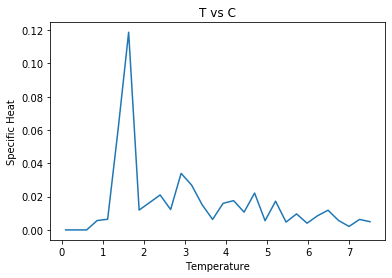

In [200]:
plt.plot(temp_arr,sp_heat)
plt.xlabel("Temperature")
plt.ylabel("Specific Heat")
plt.title("T vs C")
plt.show()


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

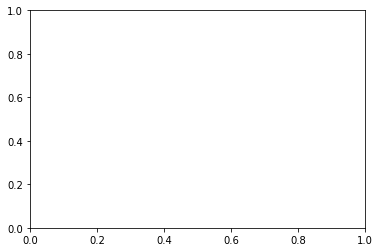

In [203]:
plt.plot(temp_arr,energy_list)
plt.xlabel("Temperature")
plt.ylabel("Energy")
plt.title("E vs C")
plt.show()


In [205]:
# def get_spec_heat(arr,temperature,energy,eps=1):#eps is energy for config 5
#     '''
#     Author: Vinay Patil
#     ~Function Description~
#     '''
# #     kb=1.38064 *10**(-23)
#     kb=1
#     diversion=np.zeros(n)
#     energy_div=np.zeros(n)
#     spec_heat=np.zeros(n)
#     n=len(temperature)
#     N=len(arr)

#     for i in range(n):
#         if i==0:
#             spec_heat[i]=abs(energy[i+1]-energy[i])/h #O(h) differentiation at the end points
#         elif i==n-1:
#             spec_heat[i]=abs(energy[i]-energy[i-1])/h #O(h) differentiation at the end points
#         else:
#             spec_heat[i]=abs((energy[i+1]-energy[i-1])/2*h) #O(h^2) differentiation
#             diversion[i]=abs((spec_heat[i]/N**2)-kb*((ln2)**2)*(28/45))
#             energy_div[i]=abs((energy[i]/N**2)-(eps/3))

#     minpos = diversion.index(min(diversion))
#     print("The critical temp found is at",temp_plot[minpos]) #ye minpos +1 kar
#     print("The error in Specific Heat per vertex is",min(diversion))                                
#     plt.scatter(temperature, spec_heat)
#     plt.plot(temperature, spec_heat)
#     plt.xlabel("Temperature")
#     plt.ylabel("Specific Heat")
#     plt.title("T vs C")
#     plt.show()
#     return spec_heat

## ERROR MODELLING: TRUE AND APPROX ERROR COMPARISONS FOR N=1,2,3,4,5

In [33]:
true_val_dict = {1:4,2:18,3:148,4:2940,5:142815}

In [23]:
def count_states_err(num,error_threshold,return_dict = False,verbose=False):
    true_err_list = []
    approx_err_list = []
    if not (error_threshold<=100 and error_threshold>0):
        print("Error! Please input error_threshold as a value between 0 and 100")
        assert (error_threshold<=100 and error_threshold>0)
    state_dict={}
    oldarr = long_loop(initialise_state(num), verbose=False)
    good_iterations = 0           #Iterations that gave us a new state, so good.
    bad_iterations = 0               #Iterations that gave us an already found state,so a waste and hence bad.
    while True:
        newarr = long_loop(oldarr,verbose=False)
        name =arr_to_string(newarr)
        if name not in state_dict:
            count_repetitions=0
            state_dict[name]=1
            good_iterations+=1
        else:
            bad_iterations+=1
            count_repetitions+=1
            state_dict[name]+=1
        percent_approx_err=good_iterations*100/(good_iterations+bad_iterations)
        if verbose:
            print(f"Good iterations = {good_iterations} and bad iterations = {bad_iterations} and Error % = {percent_approx_err}", end="\r",flush=True)
        true_err_list.append((true_val_dict[num] - good_iterations)*100/true_val_dict[num])
        approx_err_list.append(percent_approx_err)
        if percent_approx_err < error_threshold:
            break
        oldarr=newarr
    if return_dict:
        return len(state_dict),state_dict,true_err_list,approx_err_list
    else:
        return len(state_dict),true_err_list,approx_err_list

In [ ]:
count_states_err(4,5,verbose=True)

In [28]:
errorlistdict={}
for n in true_val_dict.keys():
    t1=time.process_time()
    print(f"************ N = {n} ************")
    cnt, true_err_list,approx_err_list = count_states_err(n,5)
    errorlistdict[n]=[true_err_list,approx_err_list]
    t2=time.process_time()
    print(f"Completed in {t2-t1} seconds.")

************ N = 1 ************
Completed in 0.0 seconds.
************ N = 2 ************
Completed in 0.03125 seconds.
************ N = 3 ************
Completed in 0.453125 seconds.
************ N = 4 ************
Completed in 13.65625 seconds.
************ N = 5 ************
Completed in 885.5 seconds.


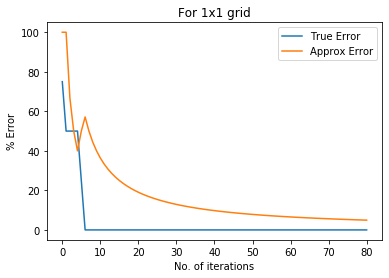

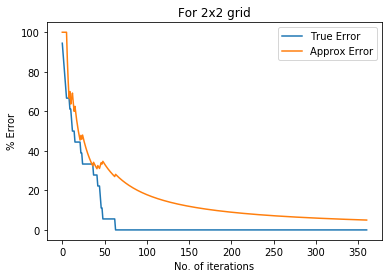

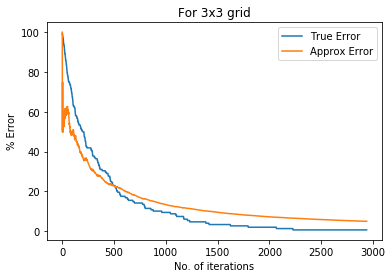

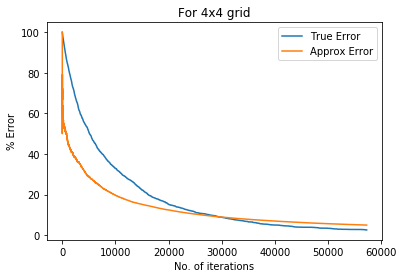

C:\Users\Sid\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


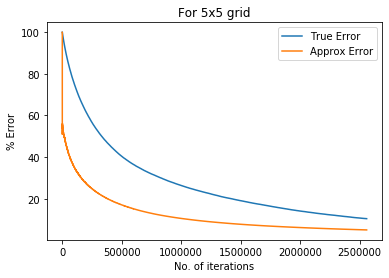

In [29]:
for n in errorlistdict.keys():
    true=errorlistdict[n][0]
    approx=errorlistdict[n][1]
    plt.plot(true, label='True Error')
    plt.plot(approx, label='Approx Error')
    plt.legend()
    plt.title(f"For {n}x{n} grid")
    plt.xlabel("No. of iterations")
    plt.ylabel("% Error")
    plt.show()